***
#### About this document
_This is the assignment for the UCL CASA module Data Science for Spatial Systems (CASA0006) <br>This is a self contained Jupyter notebook with structure introduction, discussion and embeded code and bibliography._
<br>
**Code is hosted [here](https://github.com/antoniosfiala/UCL_DSSS_Final_Project)**<br>
**Data is availble [here](https://liveuclac-my.sharepoint.com/:f:/g/personal/ucfnafi_ucl_ac_uk/EpV8UnlEQQdNpu28TZHgRYoBLl-LM4iuuDGyREiLCGTEmw?e=XV5Mrz)**
***

# Traffic accident analysis and accident severity prediction in the United Kingdom

## 1.Porject Introduction

### 1.1 Introduction

Traffic safety has always been an important issue for the sustainable development of transportation. Traffic accidents can have certain negative impacts on society, such as traffic congestion, casualties, and environmental pollution, which are not conducive to the sustainable and healthy development of transportation systems. With the continuous development of information technology, in recent years, government departments as well as many research scholars have devoted themselves to solving traffic problems by means of information science to assist in the development of intelligent transportation systems and sustainable transportation. Among them, traffic accident severity prediction has been an important and challenging direction in the field of intelligent traffic safety management system, which is important for analyzing the future development trend of traffic accidents and implementing active preventive measures under the existing road traffic conditions.


### 1.2 Literature review

In recent years, many researchers have tried different analytical methods from various perspectives in order to analyze the severity of traffic accidents and explore the relationship between accident severity and its influencing factors, among which the most widely used is the discrete choice model based on Logit or Probit models. (MENG et al., 2009; Al-Ghamdi, 2002). In recent years, artificial neural networks,support vector machines and rule-based (i.e., " if-then") data classification algorithms are also increasingly applied and their are also very explanatory (Hashmienejad, 2017).



### 1.3 Research question

The aim of this project is to analyze the factors influencing traffic accidents in the UK and to predict the severity of accidents to assist in solving problems in the field of traffic safety.
It specifically addresses the following questions.
Which age groups of drivers have the highest number of traffic accidents?
How long are vehicles used more likely to be involved in traffic accidents?
Which days of the week have the lowest number of traffic accidents?
Which speed limit roads are more likely to have traffic accidents?

In [1]:
# Packages for data manipulation, processing and visualisation
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Presentation of Data and Data preprocessing

### 2.1 Importing Data and cleaning

In this project, we used two datasets named Accidents 0515.csv and Vehicles 0515.csv derived from the data of accidents occurring in the UK from 2005-2015 in Kaggle. In order to facilitate the understanding and selection of research factors for the next step of data visualization, the join () function was first applied to join the two datasets, and then the return results of the head () and describe () functions were applied to observe the specific parameters in the datasets.

In [2]:
accidents = pd.read_csv('Accidents0515.csv',index_col='Accident_Index')
vehicles=pd.read_csv('Vehicles0515.csv', error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)

In [3]:
df = accidents.join(vehicles, how='outer')

In [4]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,...,1.0,15.0,2.0,74.0,10.0,-1.0,-1.0,-1.0,7.0,1.0
200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,...,1.0,1.0,1.0,42.0,7.0,8268.0,2.0,3.0,-1.0,-1.0
200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,...,1.0,1.0,1.0,35.0,6.0,8300.0,2.0,5.0,2.0,1.0
200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,...,1.0,15.0,1.0,62.0,9.0,1762.0,1.0,6.0,1.0,1.0
200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,...,1.0,15.0,2.0,49.0,8.0,1769.0,1.0,4.0,2.0,1.0


In [5]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
count,3.144256e+06,3.144256e+06,3.144256e+06,3.144256e+06,3.144481e+06,3.144481e+06,3.144481e+06,3.144481e+06,3.144481e+06,3.144481e+06,...,3.004425e+06,3.004425e+06,3.004425e+06,3.004425e+06,3.004425e+06,3.004425e+06,3.004425e+06,3.004425e+06,3.004425e+06,3.004425e+06
mean,4.406010e+05,2.962574e+05,-1.421666e+00,5.255432e+01,3.061660e+01,2.849668e+00,2.098666e+00,1.422741e+00,4.115839e+00,3.523968e+02,...,9.891550e-01,8.714362e+00,1.399377e+00,3.432806e+01,5.849723e+00,1.411705e+03,7.518251e-01,4.840520e+00,3.559397e+00,8.822091e-01
std,9.483568e+04,1.583615e+05,1.392781e+00,1.426111e+00,2.508302e+01,3.911298e-01,9.301832e-01,9.902698e-01,1.911975e+00,2.557684e+02,...,1.872632e-01,5.994410e+00,5.963102e-01,1.943809e+01,2.927710e+00,1.692195e+03,1.154131e+00,5.329182e+00,3.734888e+00,1.114586e+00
min,6.495000e+04,1.029000e+04,-7.516225e+00,4.991294e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,3.776100e+05,1.778830e+05,-2.336508e+00,5.148671e+01,7.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,3.000000e+00,1.240000e+02,...,1.000000e+00,2.000000e+00,1.000000e+00,2.200000e+01,5.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00
50%,4.416100e+05,2.636525e+05,-1.382849e+00,5.225844e+01,3.100000e+01,3.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,3.290000e+02,...,1.000000e+00,6.000000e+00,1.000000e+00,3.400000e+01,6.000000e+00,1.388000e+03,1.000000e+00,4.000000e+00,3.000000e+00,1.000000e+00
75%,5.228500e+05,3.951100e+05,-2.232980e-01,5.345090e+01,4.600000e+01,3.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,5.300000e+02,...,1.000000e+00,1.500000e+01,2.000000e+00,4.700000e+01,8.000000e+00,1.896000e+03,1.000000e+00,9.000000e+00,7.000000e+00,1.000000e+00
max,6.555400e+05,1.208800e+06,1.762010e+00,6.075754e+01,9.800000e+01,3.000000e+00,6.700000e+01,9.300000e+01,7.000000e+00,9.410000e+02,...,2.000000e+00,1.500000e+01,3.000000e+00,1.000000e+02,1.100000e+01,9.999900e+04,1.200000e+01,1.110000e+02,1.000000e+01,3.000000e+00


As can be seen from the above table, each column of the dataset is in numeric format, which is very convenient for processing the large number of factors in the dataset used in this project.  In order to simplify the scale of data processing, this project first combines the data of the two factors Date and Time into a single parameter named 'Date_time'. Secondly, the information of parameters with similar or less useful meaning in this project was deleted: 'Longitude', 'Latitude', 'Driver_IMD_Decile', 'Driver_Home_Area_Type', 'Location_Easting_OSGR', 'Location _Northing_OSGR', 'LSOA_of_Accident_Location', 'Junction_Control' , '2nd_Road_Class', 'Date', 'Time'.

In [6]:
df['Date_time'] =  df['Date'] +' '+ df['Time']
df.drop(['Longitude', 'Latitude', 'Driver_IMD_Decile', 'Driver_Home_Area_Type', 'Location_Easting_OSGR',
         'Location_Northing_OSGR','LSOA_of_Accident_Location', 'Junction_Control' ,'2nd_Road_Class','Date','Time'], axis=1, inplace=True)
#delete rows with similar meaning or seem not that useful


Police_Force                                   False
Accident_Severity                              False
Number_of_Vehicles                             False
Number_of_Casualties                           False
Day_of_Week                                    False
Local_Authority_(District)                     False
Local_Authority_(Highway)                      False
1st_Road_Class                                 False
1st_Road_Number                                False
Road_Type                                      False
Speed_limit                                    False
Junction_Detail                                False
2nd_Road_Number                                False
Pedestrian_Crossing-Human_Control              False
Pedestrian_Crossing-Physical_Facilities        False
Light_Conditions                               False
Weather_Conditions                             False
Road_Surface_Conditions                        False
Special_Conditions_at_Site                    

### 2.2 Identifying Missing and Null Values

In the dataset used in this project, there may be two types of missing values that may exist: null values and '-1'. The df[col] function and the isnull(). any() function are used to test the missing values for each column parameter, and the isnull().sum() function is used to count the total missing values in each column.

In [ ]:
for col in df.columns:
    df = (df[df[col]!=-1])

    
df.isnull().any()

In [7]:
df.isnull().sum()

Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Day_of_Week                                         0
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail                                     0
2nd_Road_Number                                     0
Pedestrian_Crossing-Human_Control                   0
Pedestrian_Crossing-Physical_Facilities             0
Light_Conditions                                    0
Weather_Conditions                                  0
Road_Surface_Conditions                             0
Special_Conditions_at_Site  

After obtaining the number of missing values for each feature, the average value or special value is normally input to the dataset to fill the vacancies. However, since the dataset used in this project is large enough and has enough data, it is possible to directly delete the data in the row where the vacant values are located and execute the analysis command directly. In this work, the len() function is used to get the total number of rows in the data set, and then the df.dropna() function is used to directly delete all rows containing null values. Finally, 1914,377 rows of data are obtained.

In [8]:
print(len(df))
df.dropna(inplace=True)
print(len(df))

2053446
1914377


After completing the null processing, the isnull().any() function is then applied to check the dataset for vacancy values to ensure that the dataset used in this work is currently clean and ready for analysis and visualization.

In [9]:
df.isnull().any()
#no null value exists

Police_Force                                   False
Accident_Severity                              False
Number_of_Vehicles                             False
Number_of_Casualties                           False
Day_of_Week                                    False
Local_Authority_(District)                     False
Local_Authority_(Highway)                      False
1st_Road_Class                                 False
1st_Road_Number                                False
Road_Type                                      False
Speed_limit                                    False
Junction_Detail                                False
2nd_Road_Number                                False
Pedestrian_Crossing-Human_Control              False
Pedestrian_Crossing-Physical_Facilities        False
Light_Conditions                               False
Weather_Conditions                             False
Road_Surface_Conditions                        False
Special_Conditions_at_Site                    

### 2.3 Data Visualization

As can be seen from the above analysis, the dataset is very large and it is difficult for us to discuss every variable, so only a few columns are used for the analysis.

#### Age of the driver involved in the accident

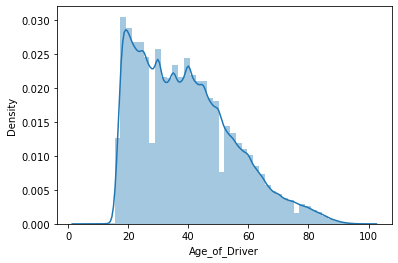

<Figure size 432x288 with 0 Axes>

In [10]:
sns.distplot(df['Age_of_Driver'])
fig = plt.figure();

It can be seen from the above figure that the age of drivers involved in accidents presents an approximately negative correlation with the accident rate. The accident rate is highest among drivers in their 20s and mid-20s, with a slight fluctuation in their 30s and 40s, but overall decreasing with age. This finding may be counterintuitive, since t intuitively most of the owners of vehicles driving on the road are between the ages of 27-33, yet they are less likely to be involved in an accident than drivers around 20 years old. We speculate that this phenomenon may be related to the impatience of young people and their unskilled driving skills.

#### Age of the vehicle involved in the accident

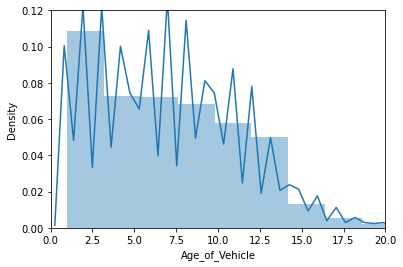

In [11]:
g = sns.distplot(df['Age_of_Vehicle'])
g.set(xlim=(0,20), ylim=(0,0.12));

The results of this data analysis are very interesting. In general, it is commonly believed that the longer a car is used, the more likely it is to break down, which leads to a high number of traffic accidents. However, the dataset we used found that new cars within two to three years of use accounted for the highest proportion of accidents that occurred instead, followed surprisingly by a gradual decrease in the proportion of accidents that occurred as the car's use increased. In other words, the older the car, the less likely it is to be involved in an accident. We speculate this result may be related to the driver's mentality. They take good care of new cars at the beginning, but after a period, they begin to relax their driving mentality, which leads to frequent accidents.Then as the car gets older, they become more vigilant to avoid damage to the vehicle and affect its service life, thus making the accident rate lower.

#### Accidents on the day of a week

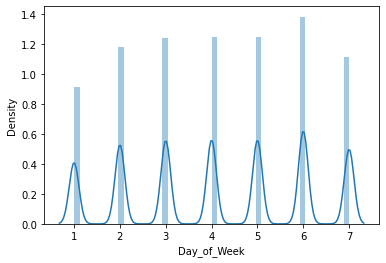

<Figure size 432x288 with 0 Axes>

In [13]:
sns.distplot(df['Day_of_Week'])
fig = plt.figure();

From the above graph, we can learn that traffic accidents occur most frequently on Saturday, the least on Monday, and the proportion of accidents on the remaining weekdays were similar, but all are higher than Sunday. We suspect the reason for this phenomenon is that people will travel and relax on Saturday, which leads to an increase in road traffic flow and an increase in the probability of accidents. On Sunday, people may prefer to rest at home to relieve the fatigue of the previous days. Monday is the first day of the week to work, to avoid late, people will be very cautious driving. All these reasons have led to the results of this data.

#### Accidents percentage in Speed Zone

ValueError: 'explode' must be of length 'x'

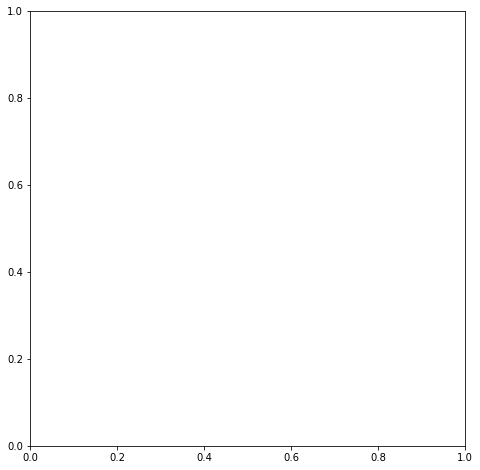

In [16]:
speed_zone_accidents = df.loc[df['Speed_limit'].isin(['20' ,'30' ,'40' ,'50' ,'60' ,'70'])]
speed  = speed_zone_accidents.Speed_limit.value_counts()

explode = (0.0, 0.0, 0.0 , 0.0 ,0.0,0.0) 
plt.figure(figsize=(10,8))
plt.pie(speed.values,  labels=None, 
        autopct='%.1f',pctdistance=0.8, labeldistance=1.9 ,explode = explode, shadow=False, startangle=160,textprops={'fontsize': 15})
 
plt.axis('equal')
plt.legend(speed.index, bbox_to_anchor=(1,0.7), loc="center right", fontsize=15, 
           bbox_transform=plt.gcf().transFigure)
plt.figtext(.5,.9,'Accidents percentage in Speed Zone', fontsize=25, ha='center')
plt.show()

As can be seen from the pie chart above, most accidents occur on roads with speed limits of 30 km/h, followed by those with speed limits of 60 km/h, 40 km/h and 70 km/h, but the number of accidents in them is far less than 30km. I suspect these roads with 30 km/h speed limit are probably to be the main roads in the city, where a large number of accidents occur due to the high number of pedestrians, the numerous traffic signs, the frequent lane changes and turning into parking lots.

#### Co-relation between variables

In addition to visualizing the above parameter relationships, we can also explore the correlations between other variables since the data set used is in numerical form. In this work, the following variables are selected to find out the correlation between various columns by using corr() function.

In [17]:
selected_features = ['Police_Force', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week',
      'Speed_limit', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities',
      'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site',
      'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Vehicle_Type', 'Vehicle_Manoeuvre',
      'Vehicle_Location-Restricted_Lane', 'Skidding_and_Overturning', '1st_Point_of_Impact', 'Journey_Purpose_of_Driver',
      'Sex_of_Driver', 'Age_of_Driver', 'Engine_Capacity_(CC)', 'Age_of_Vehicle', 'Date_time']

<AxesSubplot:>

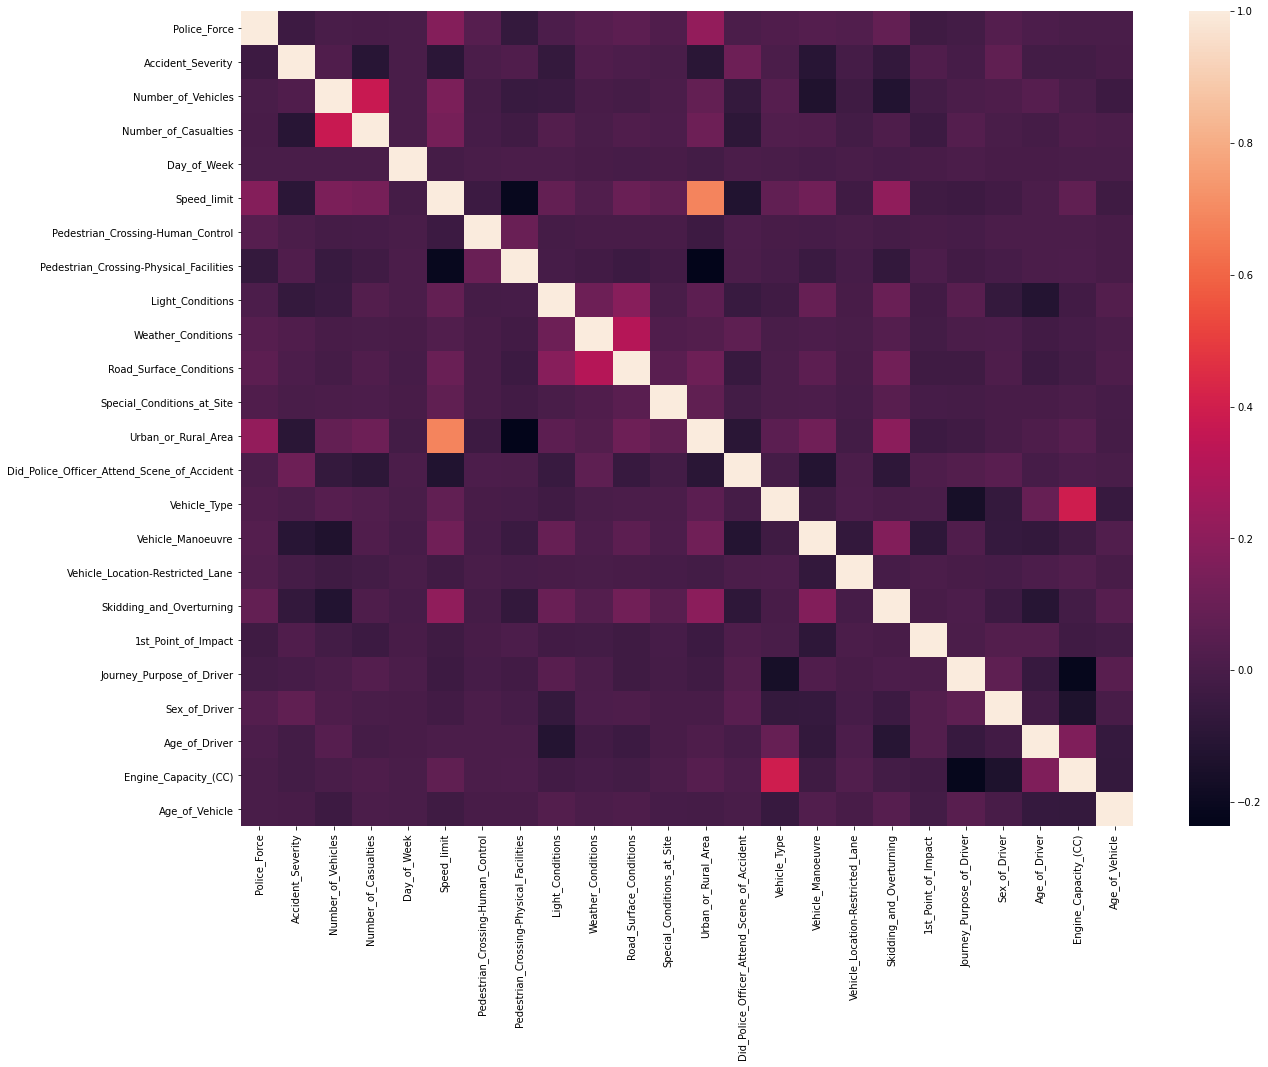

In [18]:
corr =  df[selected_features].corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr)

As we can see, unfortunately there is not that strong correlation between any of the variables. Before getting the relationship graph, we would have expected a strong correlation between weather conditions and any of the variables, based on the experience of daily life. However, all we can learn from the graph is that there is a positive correlation between speed limit and urban and rural areas.

# 3. Methodology-Prediction Model Construction

With the data analysis and visualization above, it is simple to see the relationship between the different parameters and the number of traffic accidents occurring. However, it is not enough to understand the correlation, we also need to predict the severity of the accident occurrence by different parameters. This is because after we can predict the severity of an accident, we can give some recommendations to law enforcement to investigate the matter and prepare for the future. Also, we can provide more emergency medical services for these situations. Therefore, in this section, we will use different prediction models to speculate the severity of the accident with the help of different characteristics and select the relative optimal solution from them.

## 3.1 Normalize the Data

In machine learning, different feature indicators often have different magnitudes and magnitude units, and such a situation can affect the results of data analysis. In order to eliminate the influence of magnitudes between indicators, data normalization is needed to address the comparability between data indicators. In our dataset, we can normalize the age of drivers in our dataset from 18 to 88 years old in order to not let some of the metrics negatively affect the machine learning algorithm that follows. In addition, the age of the vehicle ranges from 0 to 100, which can also skew the performance of the machine learning algorithm, and in this section we normalize this predictor as well.


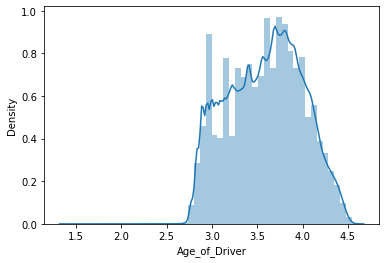

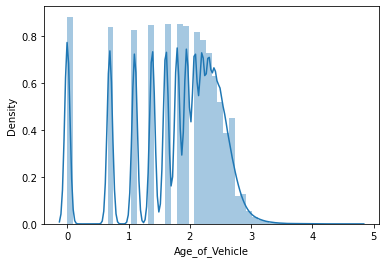

<Figure size 432x288 with 0 Axes>

In [12]:
#Normalize the data
df['Age_of_Driver'] = np.log(df['Age_of_Driver'])
df['Age_of_Vehicle'] = np.log(df['Age_of_Vehicle'])
sns.distplot(df['Age_of_Driver']);
fig = plt.figure()
sns.distplot(df['Age_of_Vehicle']);
fig = plt.figure()

## 3.2 Set Training Set and Testing Set

In order to speed up the iteration, only some meaningful features are selected for machine learning in this project, which can be seen in feature_list. then use the train_test_split function in Python to fairly split the training data and test data to make the prediction model with higher accuracy.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
#from sklearn.feature_selection import RFE

In [20]:
feature_list = ['Age_of_Driver' ,'Vehicle_Type', 'Age_of_Vehicle',
                'Engine_Capacity_(CC)','Day_of_Week' , 'Weather_Conditions' , 'Road_Surface_Conditions'
                          , 'Light_Conditions', 'Sex_of_Driver' ,'Speed_limit']
X_ini = df[feature_list]
y = df['Accident_Severity']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_ini, y,test_size=0.20, random_state=99)

## 3.3 Logistic Regression

Although Logistic Regression is called Regression, is actually a classification model and is commonly used as a machine learning method for solving dichotomous (0 or 1) problems to estimate the likelihood of something (Tolles, 2016). The essence of Logistic Regression is that the data is assumed to obey this distribution, and then a great likelihood estimate is used to do the estimation of the parameters. Logistic regression is a Sigmoid function (non-linear) mapping on top of linear regression, making logistic regression a superior classification algorithm. In essence, both belong to the generalized linear model, but they have different problems to solve. Logistic regression solves the classification problem and outputs discrete values, while linear regression solves the regression problem and outputs continuous values.

In [22]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 86.13
              precision    recall  f1-score   support

           1   0.041667  0.000183  0.000364      5465
           2   0.000000  0.000000  0.000000     47622
           3   0.861354  0.999945  0.925490    329789

    accuracy                       0.861302    382876
   macro avg   0.301007  0.333376  0.308618    382876
weighted avg   0.742519  0.861302  0.797173    382876



Predicted,1,3,All
Actual,,,
1,1,5464,5465
2,5,47617,47622
3,18,329771,329789
All,24,382852,382876


## 3.4 Decision Tree

Decision tree is a basic classification and regression method used in statistics, data mining and machine learning for prediction (Wu et al., 2008). It can distill a tree type classification model from a given unordered training sample. It can be considered as a collection of if-then rules or as a conditional probability distribution defined over the feature space and class space. Its main advantage is that the model is readable and fast in classification. For learning, a decision tree model is built using training data and based on the principle of minimizing the loss function. For prediction, the decision tree model is used to classify new data, using the decision tree model.



In [23]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 74.88
              precision    recall  f1-score   support

           1   0.036498  0.045929  0.040674      5465
           2   0.154035  0.182668  0.167134     47622
           3   0.869218  0.842166  0.855478    329789

    accuracy                       0.748772    382876
   macro avg   0.353251  0.356921  0.354429    382876
weighted avg   0.768378  0.748772  0.758232    382876



Predicted,1,2,3,All
Actual,,,,
1,251,1126,4088,5465
2,1223,8699,37700,47622
3,5403,46649,277737,329789
All,6877,56474,319525,382876


# 4. Results and Discussion

## 4.1 Results

Logistic regression and decision tree models are used to predict the severity of traffic accidents under various characteristic parameters.
First of all, in terms of accuracy, we can see from the results of the code run that the accuracy of logistic regression is 86.13, while the accuracy of decision tree is only 74.88, which can be intuitively obtained that logistic regression has higher accuracy compared to decision tree. However, the evaluation and comparison of the two methods do not rely on the accuracy alone. By looking at the results of the two methods on the confusion matrix, we can say with certainty that the decision tree model has better prediction results than the logistic regression model. The confusion matrix helps us to understand which algorithm is more effective in looking at all the different predictions for each class. From the confusion matrix of the decision tree, it is known that it is more positive and effective in predicting fatal and serious injury accidents. Even though it scores lower compared to the logistic regression model, this is because logistic regression predicts most minor accidents, and these numbers are high in the dataset overall.
Through the above analysis, it can be concluded that the decision tree is better and effective  for the prediction model of this project.




## 4.2 Discussion

The decision tree and logistic regression methods used in this work have achieved high accuracy though and can be used as effective tools for accident severity prediction. However, it is undeniable that the methods used in this paper are still too simple and lack depth. If one continues to use these two models for wake prediction, one can try to perform tuning hyperparameters and even try to predict all classes with polynomials in the hyperparameter tuning part. In addition, the Random Forest model is also a good prediction model, and more or deeper models can be chosen for prediction.

In the sense of traffic safety management, more accurate prediction of the severity of traffic accidents is the focus of research in the direction of traffic safety management. In most cases, many traffic safety management measures are still limited by the limited experience of traffic managers, which may lead to deviations from the actual situation. In contrast, historical accident data records can be effectively learned using many excellent deep learning algorithms. Their prediction results can provide an important and effective reference for the subjective judgment of safety managers. In addition, the prediction results of severity levels can provide an effective reference for the implementation of traffic accident management and control measures, such as improving traffic infrastructure, improving lighting conditions, and implementing road speed restrictions and travel safety warnings.


# 5. Conclusion

In summary, this paper provides a visual analysis of traffic accidents in the UK and predicts accident severity.
This paper firstly answers the research question of this paper, this project found that young people around 20 years old, who have used a car for two or three years, have the highest number of traffic accidents on roads with a speed limit of 30km/h, and the lowest number of traffic accidents on Mondays of the week.

Secondly, in the part of predicting accident severity, logistic regression and decision tree were used successively for analysis in this paper, and by comparing their prediction effects it was obtained that decision tree performed better in predicting accident severity for all categories. Even though logistic regression has higher accuracy, it does not mean that it does better than other algorithms.


# Reference

Al-Ghamdi, A.S., 2002. Using logistic regression to estimate the influence of accident factors on accident severity. Accident Analysis & Prevention, 34(6), pp.729-741.
Hashmienejad, S.H.A. and Hasheminejad, S.M.H., 2017. Traffic accident severity prediction using a novel multi-objective genetic algorithm. International journal of crashworthiness, 22(4), pp.425-440.
MENG, X.H., ZHENG, L. and QIN, G.M., 2009. Traffic Accidents Prediction and Prominent Influencing Factors Analysis Based on Fuzzy Logic [J]. Journal of transportation systems engineering and information Technology, 2, p.015.
Tolles, J. and Meurer, W.J., 2016. Logistic regression: relating patient characteristics to outcomes. Jama, 316(5), pp.533-534.
Wu, X., Kumar, V., Quinlan, J.R., Ghosh, J., Yang, Q., Motoda, H., McLachlan, G.J., Ng, A., Liu, B., Philip, S.Y. and Zhou, Z.H., 2008. Top 10 algorithms in data mining. Knowledge and information systems, 14(1), pp.1-37.